# Bài 3: Hàm Biến đổi Tuyến tính Từng phần
> Mục tiêu của hàm này là để tăng cường độ tương phản một cách có chọn lọc cho một dải tông màu cụ thể trong ảnh bằng cách tạo và áp dụng một Bảng Tra Cứu (LUT - Look Up Table).

|Vùng|Dải Đầu Vào (r)|Dải Đầu Ra (s)|Hành động|Mục đích|
|-|-|-|-|-|
|1|$[0, 50]$|$[0, 10]|$Nén nhẹ|Đẩy các vùng tối quá mức về đen|
|2|$[50, 150]$|$[10, 240]$|Kéo giãn mạnh|Tăng cường độ tương phản cho các chi tiết quan trọng nhất (tông màu giữa)|
|3|$[150, 255]$|$[240, 255]$|Nén nhẹ|Đẩy các vùng sáng quá mức về trắng.|

Nói nôm na là vùng nào tối sẽ càng tối và cùng nào sáng thì sẽ càng sáng. Cho nên phương pháp này được dùng để tăng cường độ tương phản một cách có chọn lọc theo một dải xác định trước và dải kết quả mong muốn.

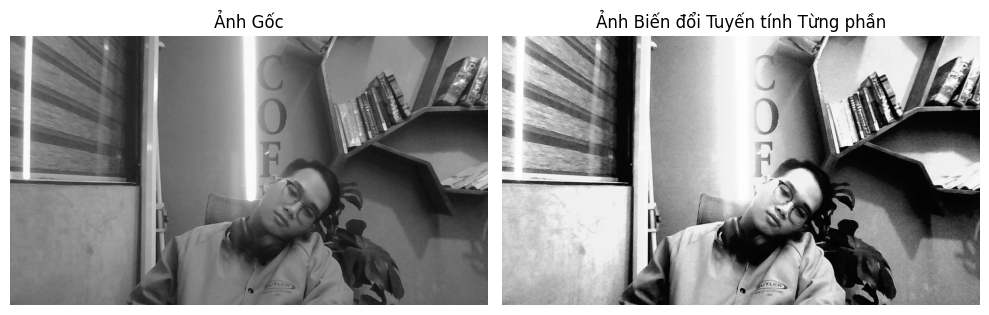

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Thiết lập tham số
r1, s1 = 50, 10
r2, s2 = 150, 240

# Tạo mảng r_values từ 0 đến 255 (đại diện cho pixel input)
r_values = np.arange(256) 

# Khởi tạo LUT (kết quả s)
LUT = np.zeros(256, dtype=np.uint8)

# Vùng 1: 0 <= r < 50
LUT[:r1] = (s1 / r1) * r_values[:r1]

# Vùng 2: 50 <= r <= 150
m2 = (s2 - s1) / (r2 - r1)
c2 = s1 - m2 * r1
LUT[r1:r2+1] = m2 * r_values[r1:r2+1] + c2

# Vùng 3: 150 < r <= 255
m3 = (255 - s2) / (255 - r2)
c3 = s2 - m3 * r2
LUT[r2+1:] = m3 * r_values[r2+1:] + c3

# 3. Đọc ảnh và áp dụng LUT
img = cv2.imread('pictures/duy.jpg', cv2.IMREAD_GRAYSCALE) # Đọc ảnh

# Áp dụng bảng tra cứu lên ảnh gốc
transformed_img = cv2.LUT(img, LUT)

# 4. Hiển thị ảnh
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Ảnh Gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title("Ảnh Biến đổi Tuyến tính Từng phần")
plt.axis("off")

plt.tight_layout()
plt.show()
